# compressive strength model using ANN

In [2]:
import numpy as np
import pandas as pd


Loading the dataset

In [3]:
import numpy as np
import pandas as pd
print(np.__version__, pd.__version__)


1.26.4 2.2.3


In [5]:
import openpyxl
import pandas as pd

# Test reading an Excel file
dataset = pd.read_excel("D:/machine learning/ann model/DATA3.xlsx")
print(dataset.head())


   Sr.no  Cement Grade  Cement content  Water  Water/Binder  Fine  Aggregate  \
0      1          52.0           335.0  166.3      0.437632            768.1   
1      2          52.4           300.0  146.2      0.423768            719.1   
2      3          52.0           290.0  146.8      0.438209            748.5   
3      4          52.4           290.0  146.2      0.423768            719.1   
4      5          52.0           300.0  146.8      0.438209            748.5   

   Course Aggregate  Fly Ash  Silica fume  Blast furnace slag  Plasticizer  \
0             945.6     45.0          0.0                 0.0          2.4   
1            1004.7     45.0          0.0                 0.0          3.0   
2            1004.7     45.0          0.0                 0.0          2.8   
3            1004.7     55.0          0.0                 0.0          2.8   
4            1004.7     35.0          0.0                 0.0          2.8   

   Super Plastercizer  Compressive strength    Aut

In [6]:
import pandas as pd

nan_columns = dataset.columns[dataset.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)


Columns with NaN values: ['Cement Grade', 'Water', 'Author', 'DOI link']


separation of dataset as X and y

In [7]:
print(dataset.columns)
y=dataset['Compressive strength']
X=dataset.drop(['Compressive strength','Author','DOI link','Sr.no','Cement Grade','Water'], axis=1)
# X = np.nan_to_num(X, nan=0.0)  # Replace NaN with 
X

Index(['Sr.no', 'Cement Grade', 'Cement content', 'Water', 'Water/Binder',
       'Fine  Aggregate', 'Course Aggregate', 'Fly Ash', 'Silica fume',
       'Blast furnace slag', 'Plasticizer', 'Super Plastercizer',
       'Compressive strength', 'Author', 'DOI link'],
      dtype='object')


,Cement content,Water/Binder,Fine Aggregate,Course Aggregate,Fly Ash,Silica fume,Blast furnace slag,Plasticizer,Super Plastercizer
0,335.0,0.437632,768.1,945.6,45.0,0.0,0.0,2.4,5.5
1,300.0,0.423768,719.1,1004.7,45.0,0.0,0.0,3.0,8.0
2,290.0,0.438209,748.5,1004.7,45.0,0.0,0.0,2.8,8.0
3,290.0,0.423768,719.1,1004.7,55.0,0.0,0.0,2.8,8.0
4,300.0,0.438209,748.5,1004.7,35.0,0.0,0.0,2.8,8.0
...,...,...,...,...,...,...,...,...,...
3200,360.0,0.500000,745.0,950.0,0.0,0.0,0.0,0.0,0.5
3201,360.0,0.500000,745.0,950.0,0.0,0.0,0.0,0.0,1.0
3202,320.0,0.562500,731.0,950.0,0.0,0.0,0.0,0.0,0.0
3203,320.0,0.562500,731.0,950.0,0.0,0.0,0.0,0.0,0.5


Splitting the data for testing and training

In [8]:
import sklearn as sk
print(sk.__version__)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

1.6.1
(2564, 9) (641, 9) (2564,) (641,)


Standardizing The dataset

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

Creating the architecture of our Deep learning model

In [ ]:
# from keras.initializers import HeNormal

# model = Sequential()

# model.add(Dense(1000, activation='relu', kernel_initializer=HeNormal(), input_shape=(X_train.shape[1],)))
# model.add(Dense(1000, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(1000, activation='relu', kernel_initializer=HeNormal()))
# # model.add(Dense(1000, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(700, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(700, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(700, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(400, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(400, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(400, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(32, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(10, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(1, activation='linear'))

In [11]:
model=Sequential()

model.add(Dense(1000, activation='leaky_relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1792, activation='leaky_relu'))  # units_1
model.add(Dense(1664, activation='leaky_relu'))  # units_2
model.add(Dense(512, activation='leaky_relu'))   # units_3
model.add(Dense(1152, activation='leaky_relu'))  # units_4
model.add(Dense(384, activation='leaky_relu'))   # units_5
model.add(Dense(128, activation='leaky_relu'))   # units_6
model.add(Dense(1664, activation='leaky_relu'))  # units_7
model.add(Dense(1408, activation='leaky_relu'))  # units_8
model.add(Dense(384, activation='leaky_relu'))   # units_9
model.add(Dense(896, activation='leaky_relu'))   # units_10
model.add(Dense(1152, activation='leaky_relu'))  # units_11
model.add(Dense(256, activation='leaky_relu'))   # units_12

# 🔹 Output Layer for Regression
model.add(Dense(1, activation='linear'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              10000     
                                                                 
 dense_1 (Dense)             (None, 1792)              1793792   
                                                                 
 dense_2 (Dense)             (None, 1664)              2983552   
                                                                 
 dense_3 (Dense)             (None, 512)               852480    
                                                                 
 dense_4 (Dense)             (None, 1152)              590976    
                                                                 
 dense_5 (Dense)             (None, 384)               442752    
                                                                 
 dense_6 (Dense)             (None, 128)               4

In [13]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)  # Try 0.0001 or even smaller
model.compile(optimizer=optimizer, loss='mse')
history=model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
65/65 [==============================] - 6s 24ms/step - loss: 740.9813 - val_loss: 178.1904
Epoch 2/10
65/65 [==============================] - 1s 17ms/step - loss: 155.8173 - val_loss: 163.7318
Epoch 3/10
65/65 [==============================] - 1s 18ms/step - loss: 142.2684 - val_loss: 181.4679
Epoch 4/10
65/65 [==============================] - 1s 18ms/step - loss: 141.6835 - val_loss: 144.2839
Epoch 5/10
65/65 [==============================] - 1s 18ms/step - loss: 137.7567 - val_loss: 145.2798
Epoch 6/10
65/65 [==============================] - 1s 18ms/step - loss: 129.8672 - val_loss: 145.8933
Epoch 7/10
65/65 [==============================] - 1s 18ms/step - loss: 136.1287 - val_loss: 158.2616
Epoch 8/10
65/65 [==============================] - 1s 19ms/step - loss: 125.7056 - val_loss: 131.9946
Epoch 9/10
65/65 [==============================] - 1s 17ms/step - loss: 121.8801 - val_loss: 144.1561
Epoch 10/10
65/65 [==============================] - 1s 16ms/step - loss:

In [14]:
y_pred=model.predict(X_test)

21/21 [==============================] - 1s 15ms/step


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4391443732125442

Text(0, 0.5, 'Loss')

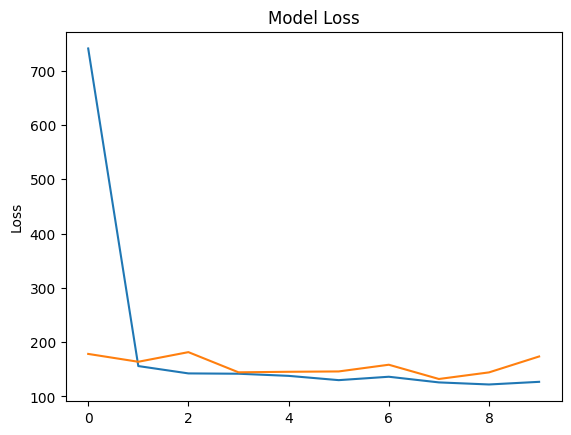

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')


In [18]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available: 1
